In [1]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

In [3]:
# Import libraries
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Read Data from the HDF5 File
def read_hdf5(filename):
    data = []
    with h5py.File(filename, 'r') as f:
        for date in f.keys():
            date_group = f[date]
            for stock_description in date_group.keys():
                stock_group = date_group[stock_description]
                for scrape_time in stock_group.keys():
                    scrape_group = stock_group[scrape_time]
                    
                    # Read metadata
                    description_json = scrape_group.attrs.get('description', '{}')
                    description = json.loads(description_json)
                    note = scrape_group.attrs.get('note', 'No notes available.')
                    
                    # Collect data
                    data.append({
                        'date': date,
                        'description': stock_description,
                        'scrape_time': scrape_time,
                        'stock_price': scrape_group['stock_price'][()],
                        'price_change': scrape_group['price_change'][()],
                        'price_change_percent': scrape_group['price_change_percent'][()],
                        'url': scrape_group.attrs.get('url', 'Not available'),
                        'scrape_time_stored': scrape_group.attrs.get('scrape_time', 'Not available'),
                        'description_metadata': description,
                        'note': note
                    })

    df = pd.DataFrame(data)
    return df

In [7]:
# Read the HDF5 file
filename = 'web_scraping/scraped_data/data.h5'
df = read_hdf5(filename)

## Visualize using Date (Days)

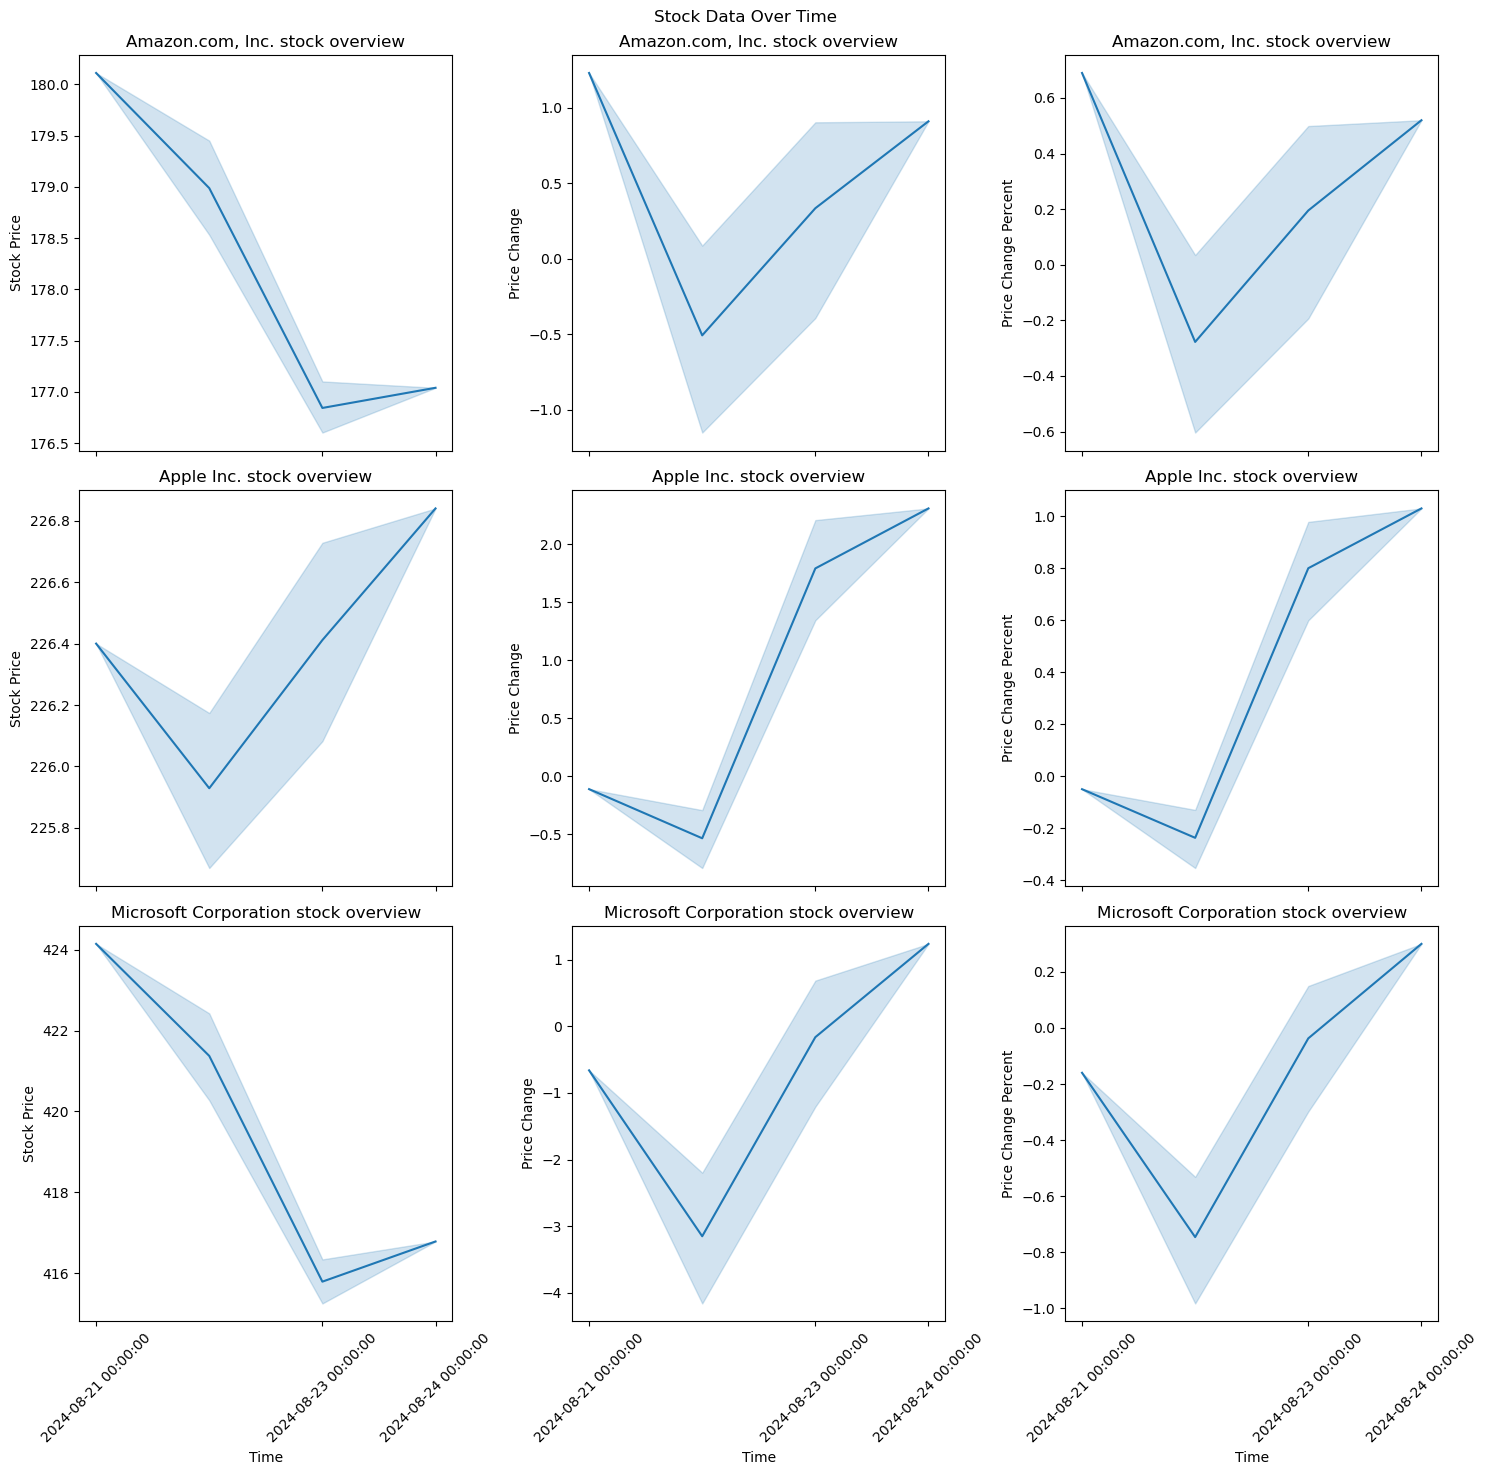

In [10]:
# Convert date to pandas datetime
df['date'] = pd.to_datetime(df['date'])

companies = df['description'].unique()
num_companies = len(companies)

fig, axes = plt.subplots(nrows=num_companies, ncols=3, figsize=(15, 5*num_companies), sharex=True, sharey=False)

# Ensure axes is a 2D array for consistency in indexing
axes = np.atleast_2d(axes)

for idx, company in enumerate(companies):
    company_data = df[df['description'] == company]
    
    # Extract the dates for ticks
    dates = company_data['date'].sort_values().unique()
    
    # Determine the ticks to display (at least 3 dates)
    if len(dates) >= 3:
        ticks_to_display = [dates[0], dates[len(dates)//2], dates[-1]]
    else:
        ticks_to_display = dates

    # Stock Price
    sns.lineplot(data=company_data, x='date', y='stock_price', ax=axes[idx, 0])
    axes[idx, 0].set_title(f'{company}')
    axes[idx, 0].set_ylabel('Stock Price')
    if ticks_to_display:
        axes[idx, 0].set_xticks(ticks_to_display)
        axes[idx, 0].set_xticklabels([str(tick) for tick in ticks_to_display], rotation=45)
    
    # Price Change
    sns.lineplot(data=company_data, x='date', y='price_change', ax=axes[idx, 1])
    axes[idx, 1].set_title(f'{company}')
    axes[idx, 1].set_ylabel('Price Change')
    if ticks_to_display:
        axes[idx, 1].set_xticks(ticks_to_display)
        axes[idx, 1].set_xticklabels([str(tick) for tick in ticks_to_display], rotation=45)
    
    # Price Change Percent
    sns.lineplot(data=company_data, x='date', y='price_change_percent', ax=axes[idx, 2])
    axes[idx, 2].set_title(f'{company}')
    axes[idx, 2].set_ylabel('Price Change Percent')
    if ticks_to_display:
        axes[idx, 2].set_xticks(ticks_to_display)
        axes[idx, 2].set_xticklabels([str(tick) for tick in ticks_to_display], rotation=45)

# Set common x-axis label and title
for ax in axes[-1, :]:
    ax.set_xlabel('Time')

plt.suptitle('Stock Data Over Time')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Visualize using scrape time (Hours)

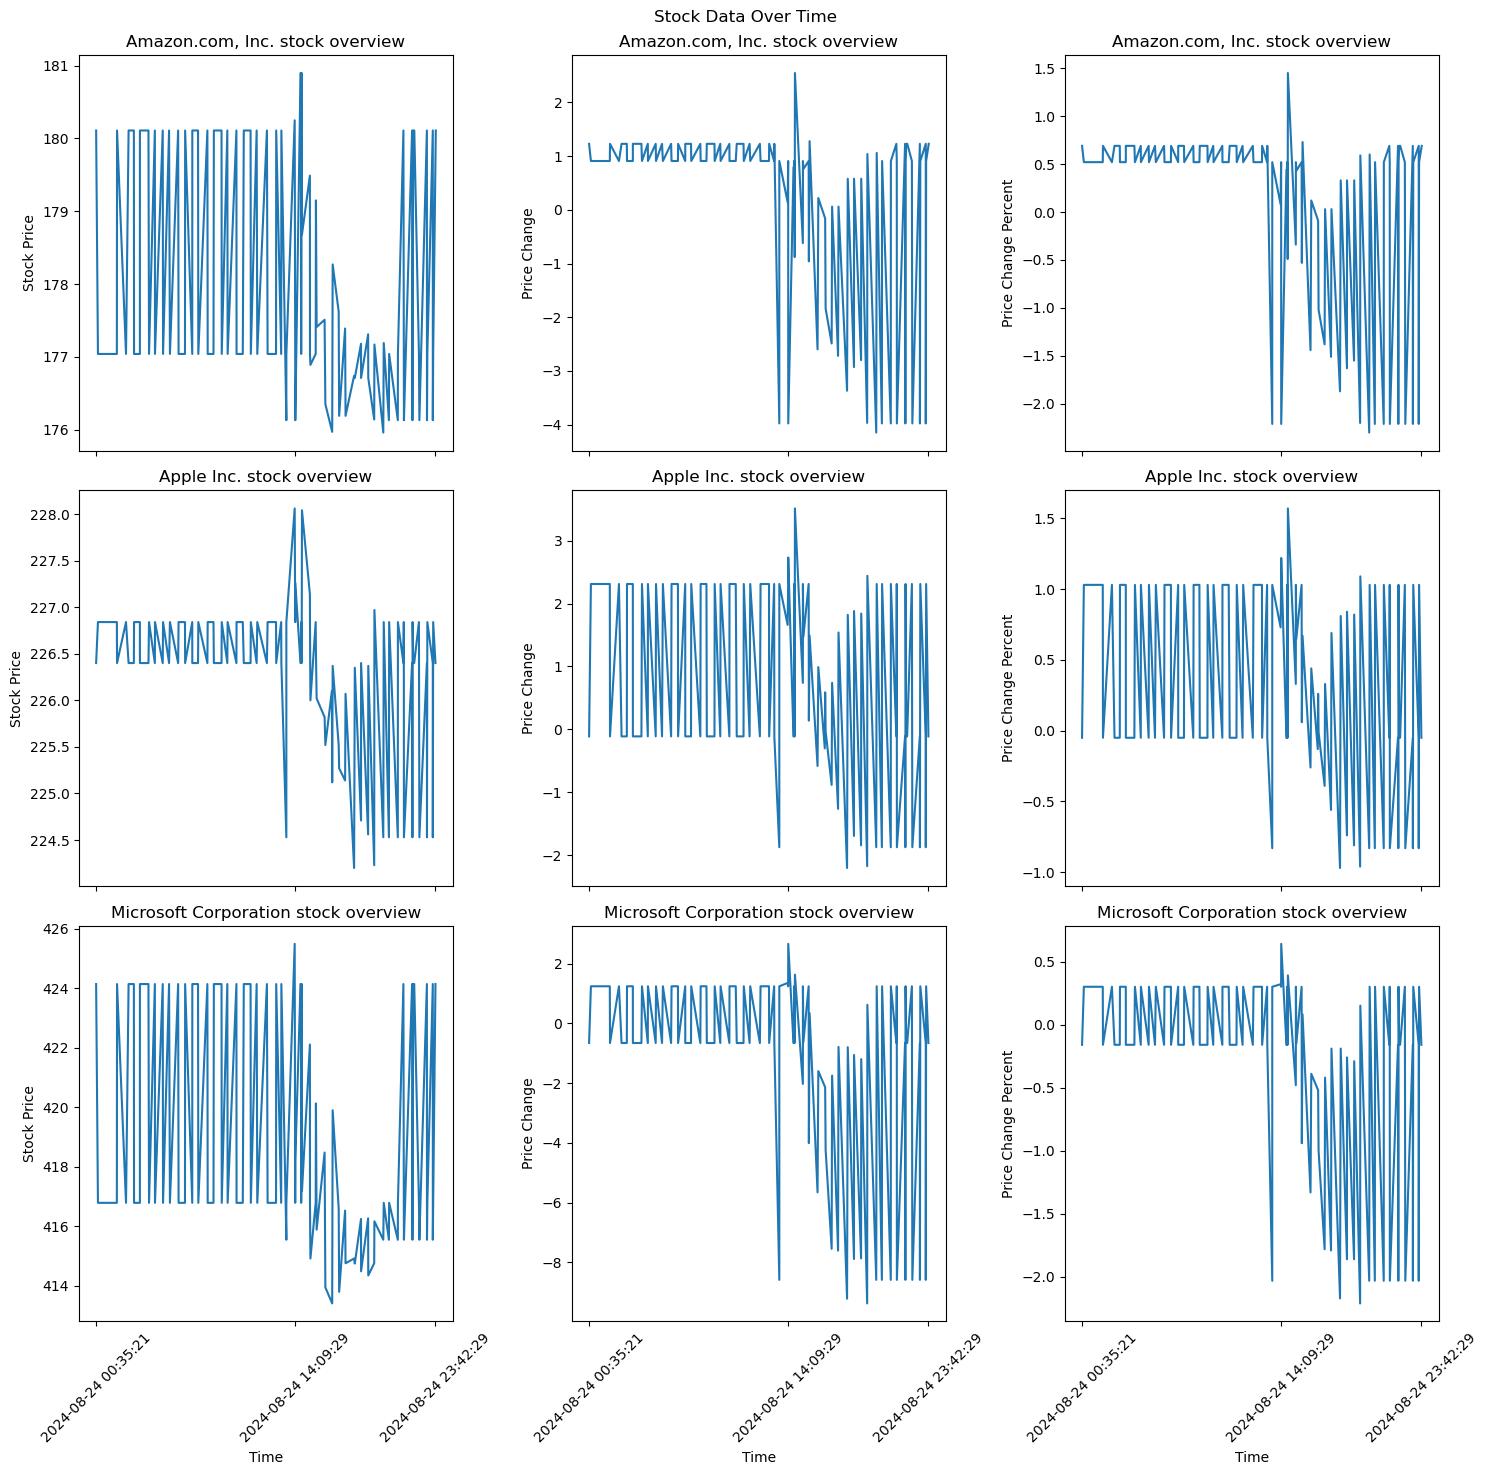

In [12]:
# Convert scrape time to pandas datetime
df['scrape_time'] = pd.to_datetime(df['scrape_time'])

fig, axes = plt.subplots(nrows=num_companies, ncols=3, figsize=(15, 5*num_companies), sharex=True, sharey=False)

for idx, company in enumerate(companies):
    company_data = df[df['description'] == company]
    
    # Extract the scrape_time for ticks
    scrape_times = company_data['scrape_time'].sort_values().unique()
    
    # Determine the ticks to display
    first_tick = scrape_times[0]
    middle_tick = scrape_times[len(scrape_times) // 2]
    last_tick = scrape_times[-1]
    ticks_to_display = [first_tick, middle_tick, last_tick]


    # Stock Price
    sns.lineplot(data=company_data, x='scrape_time', y='stock_price', ax=axes[idx, 0])
    axes[idx, 0].set_title(f'{company}')
    axes[idx, 0].set_ylabel('Stock Price')
    if ticks_to_display:
        axes[idx, 0].set_xticks(ticks_to_display)
        axes[idx, 0].set_xticklabels([str(tick) for tick in ticks_to_display], rotation=45)
    
    # Price Change
    sns.lineplot(data=company_data, x='scrape_time', y='price_change', ax=axes[idx, 1])
    axes[idx, 1].set_title(f'{company}')
    axes[idx, 1].set_ylabel('Price Change')
    if ticks_to_display:
        axes[idx, 1].set_xticks(ticks_to_display)
        axes[idx, 1].set_xticklabels([str(tick) for tick in ticks_to_display], rotation=45)
    
    # Price Change Percent
    sns.lineplot(data=company_data, x='scrape_time', y='price_change_percent', ax=axes[idx, 2])
    axes[idx, 2].set_title(f'{company}')
    axes[idx, 2].set_ylabel('Price Change Percent')
    if ticks_to_display:
        axes[idx, 2].set_xticks(ticks_to_display)
        axes[idx, 2].set_xticklabels([str(tick) for tick in ticks_to_display], rotation=45)

# Set common x-axis label and title
for ax in axes[-1, :]:
    ax.set_xlabel('Time')

plt.suptitle('Stock Data Over Time')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()